In [ ]:
import requests

def make_request(endpoint, payload = None):
  """
  Make a request to the weather API, passing the endpoint
  and payload

  Parameters:
  - endpoint: the API provides several endpoints
  - payload: a dictionary of items specifying the request

  Returns:
  - A response object
  """
  return requests.get(
      f'https://www.ncei.noaa.gov/cdo-web/api/v2/{endpoint}',
      headers={
          'token': 'ClrbcNSEeBKQrhSQeiWqRBHkpbKGiZAI'
      },
      params=payload
  )

In [ ]:
response = make_request('datasets', )

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output

{'metadata': {'resultset': {'count': 11, 'limit': 25, 'offset': 1}},
 'results': [{'datacoverage': 1,
   'id': 'GHCND',
   'maxdate': '2022-07-28',
   'mindate': '1763-01-01',
   'name': 'Daily Summaries',
   'uid': 'gov.noaa.ncdc:C00861'},
  {'datacoverage': 1,
   'id': 'GSOM',
   'maxdate': '2022-07-01',
   'mindate': '1763-01-01',
   'name': 'Global Summary of the Month',
   'uid': 'gov.noaa.ncdc:C00946'},
  {'datacoverage': 1,
   'id': 'GSOY',
   'maxdate': '2022-01-01',
   'mindate': '1763-01-01',
   'name': 'Global Summary of the Year',
   'uid': 'gov.noaa.ncdc:C00947'},
  {'datacoverage': 0.95,
   'id': 'NEXRAD2',
   'maxdate': '2022-07-28',
   'mindate': '1991-06-05',
   'name': 'Weather Radar (Level II)',
   'uid': 'gov.noaa.ncdc:C00345'},
  {'datacoverage': 0.95,
   'id': 'NEXRAD3',
   'maxdate': '2022-07-27',
   'mindate': '1994-05-20',
   'name': 'Weather Radar (Level III)',
   'uid': 'gov.noaa.ncdc:C00708'},
  {'datacoverage': 1,
   'id': 'NORMAL_ANN',
   'maxdate': '2010-

In [ ]:
output.keys()

dict_keys(['metadata', 'results'])

In [ ]:
output['metadata']

{'resultset': {'count': 11, 'limit': 25, 'offset': 1}}

In [ ]:
type(output['results'])

list

In [ ]:
output['results'][0]

{'datacoverage': 1,
 'id': 'GHCND',
 'maxdate': '2022-07-28',
 'mindate': '1763-01-01',
 'name': 'Daily Summaries',
 'uid': 'gov.noaa.ncdc:C00861'}

In [ ]:
[(i['id'],i['name']) for i in output['results']]

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

We want daily summaries.

In [ ]:
response = make_request(endpoint = 'datacategories', payload={'datasetid':'GHCND'})

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
type(output)

dict

In [ ]:
output.keys()

dict_keys(['metadata', 'results'])

In [ ]:
output['metadata']

{'resultset': {'count': 9, 'limit': 25, 'offset': 1}}

In [ ]:
type(output['results'])

list

In [ ]:
output['results'][0]

{'id': 'EVAP', 'name': 'Evaporation'}

In [ ]:
output['results']

[{'id': 'EVAP', 'name': 'Evaporation'},
 {'id': 'LAND', 'name': 'Land'},
 {'id': 'PRCP', 'name': 'Precipitation'},
 {'id': 'SKY', 'name': 'Sky cover & clouds'},
 {'id': 'SUN', 'name': 'Sunshine'},
 {'id': 'TEMP', 'name': 'Air Temperature'},
 {'id': 'WATER', 'name': 'Water'},
 {'id': 'WIND', 'name': 'Wind'},
 {'id': 'WXTYPE', 'name': 'Weather Type'}]

We are interested in the air temperature.

In [ ]:
response = make_request(endpoint = 'datatypes', payload={'datasetid':'GHCND', 'datacategoryid': 'TEMP'})

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output['metadata']

{'resultset': {'count': 8, 'limit': 25, 'offset': 1}}

In [ ]:
output['results'][0]

{'datacoverage': 1,
 'id': 'DATN',
 'maxdate': '2022-07-14',
 'mindate': '1863-05-04',
 'name': 'Number of days included in the multiday minimum temperature (MDTN)'}

In [ ]:
[(i['id'],i['name']) for i in output['results']]

[('DATN',
  'Number of days included in the multiday minimum temperature (MDTN)'),
 ('DATX',
  'Number of days included in the multiday maximum temperature (MDTX)'),
 ('MDTN', 'Multiday minimum temperature (use with DATN)'),
 ('MDTX', 'Multiday maximum temperature (use with DATX)'),
 ('TAVG', 'Average Temperature.'),
 ('TMAX', 'Maximum temperature'),
 ('TMIN', 'Minimum temperature'),
 ('TOBS', 'Temperature at the time of observation')]

TAVG, TMAX, TMIN

Let's move onto location.

In [ ]:
response = make_request(
    endpoint = 'locationcategories', 
    payload={
        'datasetid':'GHCND', 
        'startdate':'2022-07-01',
        'enddate':'2022-07-31'
        }
    )

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output['metadata']

{'resultset': {'count': 12, 'limit': 25, 'offset': 1}}

In [ ]:
output['results'][0]

{'id': 'CITY', 'name': 'City'}

In [ ]:
output['results']

[{'id': 'CITY', 'name': 'City'},
 {'id': 'CLIM_DIV', 'name': 'Climate Division'},
 {'id': 'CLIM_REG', 'name': 'Climate Region'},
 {'id': 'CNTRY', 'name': 'Country'},
 {'id': 'CNTY', 'name': 'County'},
 {'id': 'HYD_ACC', 'name': 'Hydrologic Accounting Unit'},
 {'id': 'HYD_CAT', 'name': 'Hydrologic Cataloging Unit'},
 {'id': 'HYD_REG', 'name': 'Hydrologic Region'},
 {'id': 'HYD_SUB', 'name': 'Hydrologic Subregion'},
 {'id': 'ST', 'name': 'State'},
 {'id': 'US_TERR', 'name': 'US Territory'},
 {'id': 'ZIP', 'name': 'Zip Code'}]

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31'
        }
    )

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output['metadata']

{'resultset': {'count': 1722, 'limit': 25, 'offset': 1}}

In [ ]:
output['results'][0]

{'datacoverage': 0.9977,
 'id': 'CITY:AE000001',
 'maxdate': '2022-07-27',
 'mindate': '1983-01-02',
 'name': 'Abu Dhabi, AE'}

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 25
        }
    )

In [ ]:
response.ok

True

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 1,
        'offset': 1000
        }
    )

In [ ]:
response.json()['results']

[{'datacoverage': 1,
  'id': 'CITY:US120028',
  'maxdate': '2022-07-28',
  'mindate': '1916-03-01',
  'name': 'Orlando, FL US'}]

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 1,
        'offset': 1400
        }
    )

In [ ]:
response.json()['results']

[{'datacoverage': 1,
  'id': 'CITY:US390001',
  'maxdate': '2022-07-28',
  'mindate': '1893-01-01',
  'name': 'Akron, OH US'}]

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 1,
        'offset': 900
        }
    )

In [ ]:
response.json()['results']

[{'datacoverage': 1,
  'id': 'CITY:US050019',
  'maxdate': '2022-07-27',
  'mindate': '1892-09-01',
  'name': 'Searcy, AR US'}]

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 1,
        'offset': 950
        }
    )

In [ ]:
response.json()['results']

[{'datacoverage': 1,
  'id': 'CITY:US080002',
  'maxdate': '2022-07-27',
  'mindate': '1893-03-01',
  'name': 'Canon City, CO US'}]

In [ ]:
response = make_request(
    endpoint = 'locations', 
    payload={
        'datasetid':'GHCND', 
        'locationcategoryid': 'CITY',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 25,
        'offset': 925
        }
    )

In [ ]:
[(i['id'],i['name']) for i in response.json()['results']]

[('CITY:US060025', 'Riverside, CA US'),
 ('CITY:US060026', 'Rosamond, CA US'),
 ('CITY:US060027', 'Sacramento, CA US'),
 ('CITY:US060028', 'Salinas, CA US'),
 ('CITY:US060029', 'San Bernardino, CA US'),
 ('CITY:US060030', 'San Diego, CA US'),
 ('CITY:US060031', 'San Francisco, CA US'),
 ('CITY:US060032', 'San Jose, CA US'),
 ('CITY:US060033', 'San Luis Obispo, CA US'),
 ('CITY:US060034', 'Santa Ana, CA US'),
 ('CITY:US060035', 'Santa Barbara, CA US'),
 ('CITY:US060036', 'Santa Clarita, CA US'),
 ('CITY:US060037', 'Santa Cruz, CA US'),
 ('CITY:US060038', 'Santa Maria, CA US'),
 ('CITY:US060039', 'Santa Rosa, CA US'),
 ('CITY:US060040', 'Simi Valley, CA US'),
 ('CITY:US060041', 'Soledad, CA US'),
 ('CITY:US060042', 'Stockton, CA US'),
 ('CITY:US060043', 'Susanville, CA US'),
 ('CITY:US060044', 'Ukiah, CA US'),
 ('CITY:US060045', 'Vallejo, CA US'),
 ('CITY:US060046', 'Visalia, CA US'),
 ('CITY:US060047', 'Yuba City, CA US'),
 ('CITY:US060048', 'Yucca Valley, CA US'),
 ('CITY:US080001', 'B

In [ ]:
'CITY:US060031'

In [ ]:
response = make_request(
    endpoint = 'stations', 
    payload={
        'datasetid':'GHCND', 
        'locationid': 'CITY:US060031',
        'datacategoryid': 'TEMP',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        }
    )

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output['metadata']

{'resultset': {'count': 24, 'limit': 25, 'offset': 1}}

In [ ]:
output['results'][0]

{'datacoverage': 0.9763,
 'elevation': 11.6,
 'elevationUnit': 'METERS',
 'id': 'GHCND:USC00043244',
 'latitude': 37.5422,
 'longitude': -122.0158,
 'maxdate': '2022-07-27',
 'mindate': '1996-06-01',
 'name': 'FREMONT, CA US'}

In [ ]:
sorted([(i['id'],i['name']) for i in output['results']])

[('GHCND:USC00043244', 'FREMONT, CA US'),
 ('GHCND:USC00043714', 'HALF MOON BAY, CA US'),
 ('GHCND:USC00044500', 'KENTFIELD, CA US'),
 ('GHCND:USC00046336', 'OAKLAND MUSEUM, CA US'),
 ('GHCND:USC00047339', 'REDWOOD CITY, CA US'),
 ('GHCND:USC00047414', 'RICHMOND, CA US'),
 ('GHCND:USC00047880', 'SAN RAFAEL CIVIC CENTER, CA US'),
 ('GHCND:USC00049219', 'VALLEJO, CA US'),
 ('GHCND:USR0000CBAR', 'BARNABY CALIFORNIA, CA US'),
 ('GHCND:USR0000CBIR', 'BIG ROCK CALIFORNIA, CA US'),
 ('GHCND:USR0000CBKD', 'BLACK DIAMOND CALIFORNIA, CA US'),
 ('GHCND:USR0000CBRI', 'BRIONES CALIFORNIA, CA US'),
 ('GHCND:USR0000COKN', 'OAKLAND NORTH CALIFORNIA, CA US'),
 ('GHCND:USR0000COKS', 'OAKLAND SOUTH CALIFORNIA, CA US'),
 ('GHCND:USR0000CPUL', 'PULGAS CALIFORNIA, CA US'),
 ('GHCND:USR0000CSVA', 'SPRING VALLEY CALIFORNIA, CA US'),
 ('GHCND:USR0000CTRA', 'LAS TRAMPAS CALIFORNIA, CA US'),
 ('GHCND:USR0000CWOO', 'WOODACRE CALIFORNIA, CA US'),
 ('GHCND:USW00023230', 'OAKLAND INTERNATIONAL AIRPORT, CA US'),
 ('G

In [ ]:
'GHCND:USW00023272'

In [ ]:
response = make_request(
    endpoint = 'data', 
    payload={
        'datasetid':'GHCND', 
        'datatypeid': ['TMAX','TMIN','TAVG'],
        'locationid': 'CITY:US060031',
        'stationid': 'GHCND:USW00023272',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        }
    )

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output['metadata']

{'resultset': {'count': 52, 'limit': 25, 'offset': 1}}

In [ ]:
output['results'][0]

{'attributes': ',,W,2400',
 'datatype': 'TMAX',
 'date': '2022-07-01T00:00:00',
 'station': 'GHCND:USW00023272',
 'value': 156}

In [ ]:
import pandas as pd
pd.DataFrame(output['results'])

,date,datatype,station,attributes,value
0,2022-07-01T00:00:00,TMAX,GHCND:USW00023272,",,W,2400",156
1,2022-07-01T00:00:00,TMIN,GHCND:USW00023272,",,W,2400",111
2,2022-07-02T00:00:00,TMAX,GHCND:USW00023272,",,W,2400",156
3,2022-07-02T00:00:00,TMIN,GHCND:USW00023272,",,W,2400",111
4,2022-07-03T00:00:00,TMAX,GHCND:USW00023272,",,W,2400",161
5,2022-07-03T00:00:00,TMIN,GHCND:USW00023272,",,W,2400",117
6,2022-07-04T00:00:00,TMAX,GHCND:USW00023272,",,W,2400",211
7,2022-07-04T00:00:00,TMIN,GHCND:USW00023272,",,W,2400",133
8,2022-07-05T00:00:00,TMAX,GHCND:USW00023272,",,W,2400",211
9,2022-07-05T00:00:00,TMIN,GHCND:USW00023272,",,W,2400",167


In [ ]:
response = make_request(
    endpoint = 'data', 
    payload={
        'datasetid':'GHCND', 
        'datatypeid': 'TAVG',
        'locationid': 'CITY:US060031',
        'stationid': 'GHCND:USW00023272',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        }
    )

In [ ]:
response.ok

True

In [ ]:
output = response.json()

In [ ]:
output.keys()

dict_keys([])

we need the airport station instead

In [ ]:
('GHCND:USW00023234', 'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US')

In [ ]:
response = make_request(
    endpoint = 'data', 
    payload={
        'datasetid':'GHCND', 
        'datatypeid': ['TMAX','TMIN','TAVG'],
        'locationid': 'CITY:US060031',
        'stationid': 'GHCND:USW00023234',
        'startdate':'2022-07-01',
        'enddate':'2022-07-31',
        'limit': 100
        }
    )

In [ ]:
response.ok

True

In [ ]:
output['metadata']

{'resultset': {'count': 80, 'limit': 25, 'offset': 1}}

In [ ]:
output = response.json()

In [ ]:
pd.DataFrame(output['results']).tail()

,date,datatype,station,attributes,value
75,2022-07-26T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",173
76,2022-07-26T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",228
77,2022-07-26T00:00:00,TMIN,GHCND:USW00023234,",,D,2400",144
78,2022-07-27T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",171
79,2022-07-28T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",153


In [ ]:
response = make_request(
    endpoint = 'data', 
    payload={
        'datasetid':'GHCND', 
        'datatypeid': ['TMAX','TMIN','TAVG'],
        'locationid': 'CITY:US060031',
        'stationid': 'GHCND:USW00023234',
        'startdate':'2022-06-26',
        'enddate':'2022-07-26',
        'limit': 100
        }
    )

In [ ]:
output = response.json()

In [ ]:
df = pd.DataFrame(output['results'])

In [ ]:
df.datatype.value_counts()

TAVG    31
TMAX    31
TMIN    31
Name: datatype, dtype: int64

In [ ]:
df.head()

,date,datatype,station,attributes,value
0,2022-06-26T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",158
1,2022-06-26T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",200
2,2022-06-26T00:00:00,TMIN,GHCND:USW00023234,",,D,2400",122
3,2022-06-27T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",157
4,2022-06-27T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",206


In [ ]:
df = df.drop(columns=['station','attributes'])

In [ ]:
df

,date,datatype,value
0,2022-06-26T00:00:00,TAVG,158
1,2022-06-26T00:00:00,TMAX,200
2,2022-06-26T00:00:00,TMIN,122
3,2022-06-27T00:00:00,TAVG,157
4,2022-06-27T00:00:00,TMAX,206
...,...,...,...
88,2022-07-25T00:00:00,TMAX,217
89,2022-07-25T00:00:00,TMIN,128
90,2022-07-26T00:00:00,TAVG,173
91,2022-07-26T00:00:00,TMAX,228


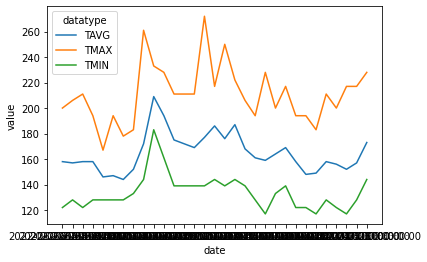

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x='date', y='value', hue='datatype')
plt.show()

In [ ]:
df.apply(lambda row: row['value']/10,axis=1)

0     15.8
1     20.0
2     12.2
3     15.7
4     20.6
      ... 
88    21.7
89    12.8
90    17.3
91    22.8
92    14.4
Length: 93, dtype: float64

In [ ]:
df.loc[:,'value'] = df['value'].apply(lambda value: value/10)

In [ ]:
df

,date,datatype,value
0,2022-06-26T00:00:00,TAVG,15.8
1,2022-06-26T00:00:00,TMAX,20.0
2,2022-06-26T00:00:00,TMIN,12.2
3,2022-06-27T00:00:00,TAVG,15.7
4,2022-06-27T00:00:00,TMAX,20.6
...,...,...,...
88,2022-07-25T00:00:00,TMAX,21.7
89,2022-07-25T00:00:00,TMIN,12.8
90,2022-07-26T00:00:00,TAVG,17.3
91,2022-07-26T00:00:00,TMAX,22.8


In [ ]:
df = df.rename(
    columns = {'value':'temp_C'}
)

In [ ]:
df

,date,datatype,temp_C
0,2022-06-26,TAVG,15.8
1,2022-06-26,TMAX,20.0
2,2022-06-26,TMIN,12.2
3,2022-06-27,TAVG,15.7
4,2022-06-27,TMAX,20.6
...,...,...,...
88,2022-07-25,TMAX,21.7
89,2022-07-25,TMIN,12.8
90,2022-07-26,TAVG,17.3
91,2022-07-26,TMAX,22.8


In [ ]:
df.loc[:,'date'] = pd.to_datetime(df.date)

In [ ]:
df

,date,datatype,temp_C
0,2022-06-26,TAVG,15.8
1,2022-06-26,TMAX,20.0
2,2022-06-26,TMIN,12.2
3,2022-06-27,TAVG,15.7
4,2022-06-27,TMAX,20.6
...,...,...,...
88,2022-07-25,TMAX,21.7
89,2022-07-25,TMIN,12.8
90,2022-07-26,TAVG,17.3
91,2022-07-26,TMAX,22.8


In [ ]:
wide_df = df.pivot(
    index='date',
    columns = 'datatype',
    values = 'temp_C'
)

In [ ]:
wide_df

datatype,TAVG,TMAX,TMIN
date,,,
2022-06-26,15.8,20.0,12.2
2022-06-27,15.7,20.6,12.8
2022-06-28,15.8,21.1,12.2
2022-06-29,15.8,19.4,12.8
2022-06-30,14.6,16.7,12.8
2022-07-01,14.7,19.4,12.8
2022-07-02,14.4,17.8,12.8
2022-07-03,15.2,18.3,13.3
2022-07-04,17.2,26.1,14.4


In [ ]:
wide_df.columns

Index(['TAVG', 'TMAX', 'TMIN'], dtype='object', name='datatype')

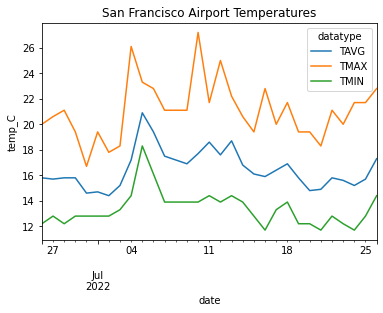

In [ ]:
wide_df.plot(
    kind='line',
    xlabel = 'date',
    ylabel = 'temp_C',
    title = 'San Francisco Airport Temperatures'
    )

In [ ]:
wide_df.reset_index().melt(id_vars='date',value_vars=['TMIN','TMAX','TAVG'])

,date,datatype,value
0,2022-06-26,TMIN,12.2
1,2022-06-27,TMIN,12.8
2,2022-06-28,TMIN,12.2
3,2022-06-29,TMIN,12.8
4,2022-06-30,TMIN,12.8
...,...,...,...
88,2022-07-22,TAVG,15.8
89,2022-07-23,TAVG,15.6
90,2022-07-24,TAVG,15.2
91,2022-07-25,TAVG,15.7
